Data set analysis:
- The data set'sessions.csv' keeps track of the players activity and also the timestamps.
- There are a total of 5 variables within the data set, such as 'hashedEmail','start_time', 'end_time', 'original_start_time', 'original_end_time'.
- Some of the potential issues within the data may be issues with regard to time zones.
- The seconed data set 'players.csv' tracks the players experience with playing the game, demographics, and also whether they are subscribed or not.
- There are a total of 7 variables within the data set, being 'experience', 'subcription', 'hashedEmail', 'played_hours', 'name', 'gender', and 'Age'.
- Some of the potential errors in this data are the discrepancies within the experience labels. For example the difference in classification between'regulaur' and vetern' is quite ambiguous, as there isn't a quantitative way to determine the classification. 

Questions:
The broad question that this project will be exploring is 'We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts'. Using this broader question, my specific question for this project is "Can age group predict the amount of gameplay data contributed by male players in the dataset?". In order to properly wrangle my data, I will start by filtering the data just to contain the male players within the data set, followed by grouping the individuals by age group, and finally combine the two data sets to retrieve data about the gameplays correlated to each age. 

In [75]:
library(tidyverse) 
library(dplyr)

### Loading in the Data 

In [69]:
players <- read_csv("https://raw.githubusercontent.com/baker11396/DSCI-100-Indiviual-Project-/refs/heads/main/players.csv")
players
sessions <- read_csv("https://raw.githubusercontent.com/baker11396/DSCI-100-Indiviual-Project-/refs/heads/main/sessions.csv")
sessions


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### Calculating the mean value for each quantitative varible 

In [76]:
players_mean <- players |> 
summarise(mean_age = mean(Age, na.rm = TRUE), 
          mean_played_hours = mean(played_hours, na.rm = TRUE))
players_mean 


mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


### Visualisation for experience compared to average age 

First rearranging the data to find the experience level, along with the average mean age for each of the respective experience levels before making the visualisation. 

In [78]:
experience_age_mean <- players |>
  group_by(experience) |>
  summarise(mean_age = mean(Age, na.rm = TRUE))
experience_age_mean

experience,mean_age
<chr>,<dbl>
Amateur,20.25397
Beginner,21.65714
Pro,16.92308
Regular,20.60000
Veteran,20.95833


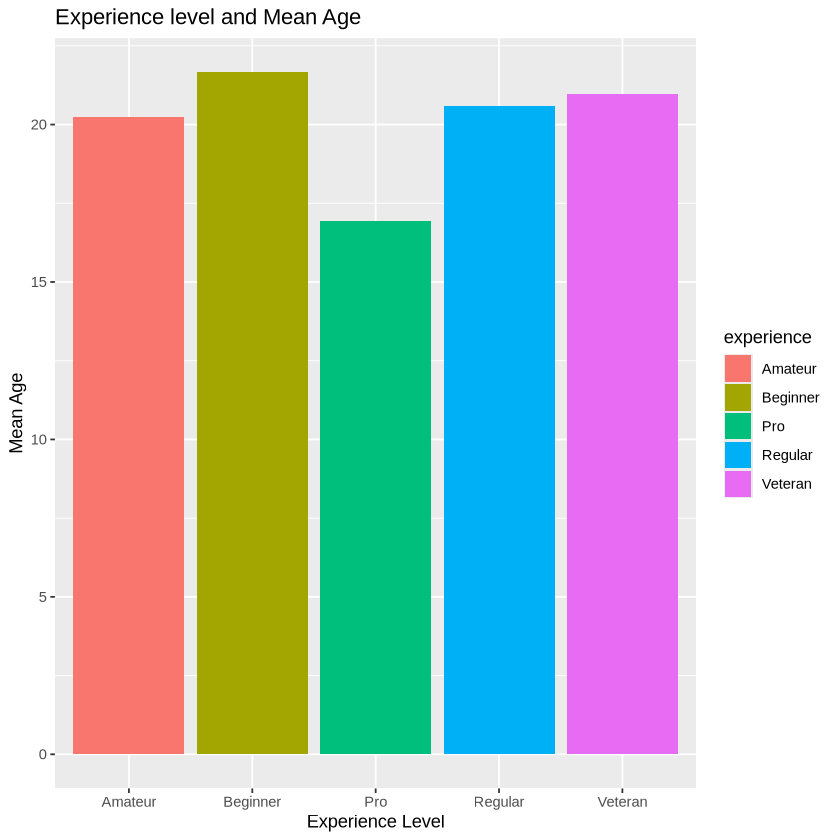

In [84]:
experience_age_plot <- ggplot(experience_age_mean, aes(x = experience, y = mean_age, fill = experience)) +
  geom_bar(stat = "identity") +  
  labs(title = "Experience level and Mean Age",
    x = "Experience Level",
    y = "Mean Age") 
experience_age_plot 

### Visulisation for Subscription and Hours played 

For this visualisation, I will first take the mean number of hours played for both subscribed and unsubscribed players (subscribed being 'TRUE' and unsunscriped being 'FALSE' before graphing the data. 

In [87]:
subscription_mean_hours <- players |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

subscription_mean_hours

subscribe,mean_hours
<lgl>,<dbl>
FALSE,0.5019231
TRUE,7.7756944


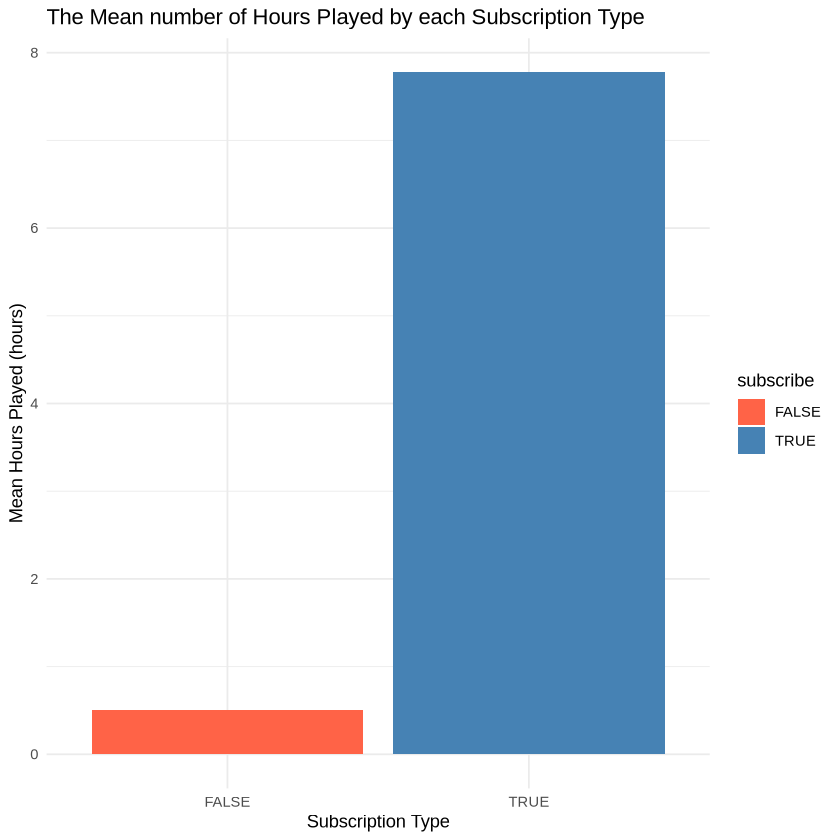

In [90]:
subscription_hours_plot <- ggplot(subscription_mean_hours, aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(title = "The Mean number of Hours Played by each Subscription Type",
       x = "Subscription Type",
       y = "Mean Hours Played (hours)") +
  theme_minimal() +
  scale_fill_manual(values = c("TRUE" = "steelblue", "FALSE" = "tomato"))
subscription_hours_plot

### Visulastion for gender and average number of hours played 

Finally, for the last visualisation, I will first group all of the different gender categories from the data collected and the average hours played. Next, I will create a bar plot visualisation for this data. 

In [94]:

gender_mean_hours <- players |>
  group_by(gender) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

gender_mean_hours

gender,mean_hours
<chr>,<dbl>
Agender,6.25000000
Female,10.63513514
Male,4.12741935
Non-binary,14.88000000
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


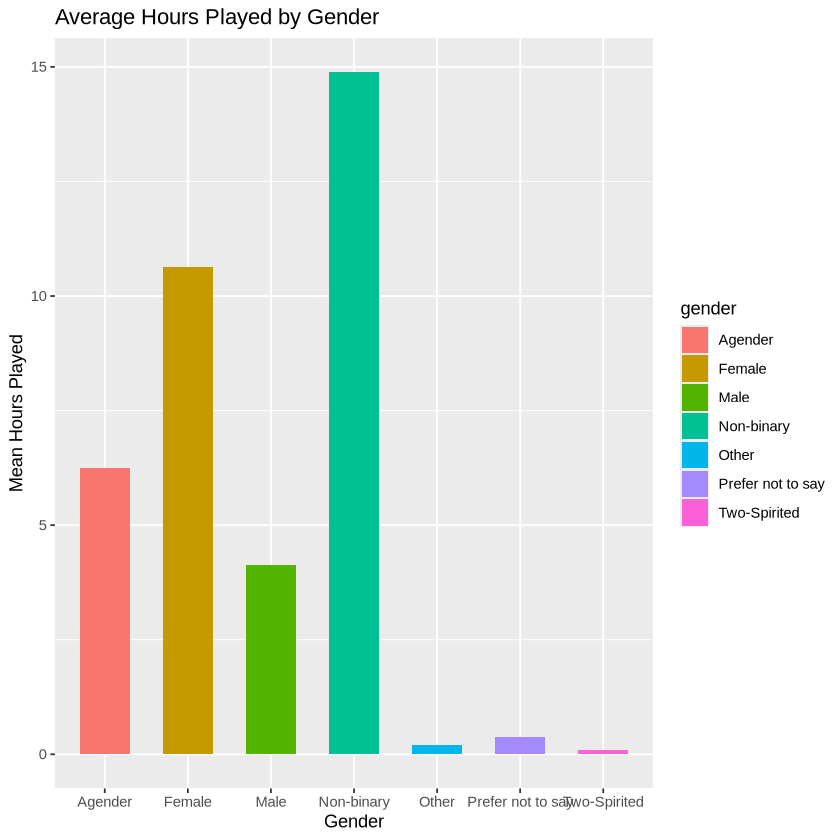

In [95]:
gender_hours_plot <- ggplot(gender_mean_hours, aes(x = gender, y = mean_hours, fill = gender)) +
  geom_bar(stat = "identity", width = 0.6) +
  labs(title = "Average Hours Played by Gender",
       x = "Gender",
       y = "Mean Hours Played")
gender_hours_plot 

### Exploratory data analysis from the graphs 

With my specific question being: Can age group predict the amount of gameplay data contributed by male players in the dataset?, my three exploratory graphs were: 1. visualisation for experience compared to average age; 2. visualisation for subscription and hours played; and 3. visualisation for gender and average number of hours played. The first visualisation plot gave insight into how more experienced players will provide more gameplay data; however, out of all of my visulisations this one proved to be the least useful for integrating into my exploration. The second visualisation demonstrates how subscribed players are likely to be more engaged in their gameplay, therefore playing for longer periods of time, so it offers the possibility for a cross-reference if subscription status correlates with age and gender (specifically males). Finally, for the third visualisation, the graph demonstrated which gender had the highest average hours played. Even though males didn't necessarily have the highest mean hours, there are more male entries; thus, more exploration could be done into the standard deviation between the hours played as there could be a larer range compared with non-binary individuals as there are fewer entries. 

### Methods and Plan 

My method for the following exploration will be to analyse male gameplay data, specifically surrounding which age group would be best for targeting to obtain the most gameplay data. 
I would be using a general regression model. A regression model would be a suitable option as the dependent variable is continuous; it would allow for an analysis on which
Agegroups provide the most gameplay data for males. The assumptions this model involves are that both an independent and dependent variable are required (age group and hours played). It is 
It is also important to take into consideration the model's limitations, such as because it is a regression model, if the data does not follow a linear nature, it may be subject to more outliers, which would effect the results. To compare the data, certain statistical tests can be conducted, such as the R^2 varible test. This model processing includes filtering the data to only include players who are male, grouping age categories into ranges such as under 18, 18-24, then 25 and above, and then creating a regression model using ggplot. For the data processing, I would only use data from the players. csv file as it contains the hours and gender-specific data, compared to the sessions.csv being more time zone specific and the players.csv includes the overall hours summary. 